In [1]:
import numpy as np
import pandas as pd

import requests
import os

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

# This will allow us to avoid a FutureWarning when plotting.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [73]:
# read data
df = pd.read_csv("./output/vehicle_counts_by_state.csv")

In [74]:
df.head(5)

,State,Year,EV,PHEV,HEV,Biodiesel,E85,CNG,Propane,Hydrogen,Methanol,Gasoline,Diesel
0,Alabama,2021,"4,700","3,300","42,500","40,500","449,500",500,100,0,0,"4,051,000","123,500"
1,Alaska,2021,"1,300",500,"7,300","7,600","50,100",100,0,0,0,"464,200","31,700"
2,Arizona,2021,"40,700","15,500","132,200","51,000","460,400",900,900,0,0,"5,395,300","191,800"
3,Arkansas,2021,"2,400","1,800","26,100","28,700","290,200",300,0,0,0,"2,241,600","88,800"
4,California,2021,"563,100","315,300","1,355,900","163,600","1,343,200","12,600","1,500","11,800",0,"30,512,600","710,500"


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      306 non-null    object
 1   Year       306 non-null    int64 
 2   EV         306 non-null    object
 3   PHEV       306 non-null    object
 4   HEV        306 non-null    object
 5   Biodiesel  306 non-null    object
 6   E85        306 non-null    object
 7   CNG        306 non-null    object
 8   Propane    306 non-null    object
 9   Hydrogen   306 non-null    object
 10  Methanol   306 non-null    int64 
 11  Gasoline   306 non-null    object
 12  Diesel     306 non-null    object
dtypes: int64(2), object(11)
memory usage: 31.2+ KB


In [76]:
# change the datatype for the column
df['EV'] = df['EV'].str.replace(r'\D', '').astype(int)
df['PHEV'] = df['PHEV'].str.replace(r'\D', '').astype(int)
df['HEV'] = df['HEV'].str.replace(r'\D', '').astype(int)
df['Biodiesel'] = df['Biodiesel'].str.replace(r'\D', '').astype(int)
df['E85'] = df['E85'].str.replace(r'\D', '').astype(int)
df['CNG'] = df['CNG'].str.replace(r'\D', '').astype(int)
df['Propane'] = df['Propane'].str.replace(r'\D', '').astype(int)
df['Hydrogen'] = df['Hydrogen'].str.replace(r'\D', '').astype(int)
df['Gasoline'] = df['Gasoline'].str.replace(r'\D', '').astype(int)
df['Diesel'] = df['Diesel'].str.replace(r'\D', '').astype(int)

C:\Users\skyne\AppData\Local\Temp\ipykernel_42940\2426847703.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['EV'] = df['EV'].str.replace(r'\D', '').astype(int)
C:\Users\skyne\AppData\Local\Temp\ipykernel_42940\2426847703.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['PHEV'] = df['PHEV'].str.replace(r'\D', '').astype(int)
C:\Users\skyne\AppData\Local\Temp\ipykernel_42940\2426847703.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['HEV'] = df['HEV'].str.replace(r'\D', '').astype(int)
C:\Users\skyne\AppData\Local\Temp\ipykernel_42940\2426847703.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Biodiesel'] = df['Biodiesel'].str.replace(r'\D', '').astype(int)
C:\Users\skyne\AppData\Local\Temp\ipykernel_42940\2426847703.py:6: FutureWarning: The default value of regex

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      306 non-null    object
 1   Year       306 non-null    int64 
 2   EV         306 non-null    int32 
 3   PHEV       306 non-null    int32 
 4   HEV        306 non-null    int32 
 5   Biodiesel  306 non-null    int32 
 6   E85        306 non-null    int32 
 7   CNG        306 non-null    int32 
 8   Propane    306 non-null    int32 
 9   Hydrogen   306 non-null    int32 
 10  Methanol   306 non-null    int64 
 11  Gasoline   306 non-null    int32 
 12  Diesel     306 non-null    int32 
dtypes: int32(10), int64(2), object(1)
memory usage: 19.2+ KB


In [78]:
# change the columns to lower case and replace the blank to underline
df.columns = [col.lower().replace(' ','_') for col in df.columns]

In [79]:
df.head()

,state,year,ev,phev,hev,biodiesel,e85,cng,propane,hydrogen,methanol,gasoline,diesel
0,Alabama,2021,4700,3300,42500,40500,449500,500,100,0,0,4051000,123500
1,Alaska,2021,1300,500,7300,7600,50100,100,0,0,0,464200,31700
2,Arizona,2021,40700,15500,132200,51000,460400,900,900,0,0,5395300,191800
3,Arkansas,2021,2400,1800,26100,28700,290200,300,0,0,0,2241600,88800
4,California,2021,563100,315300,1355900,163600,1343200,12600,1500,11800,0,30512600,710500


In [80]:
# Create List of columns
col_list= ['ev', 'phev', 'hev', 'biodiesel', 'e85', 'cng', 'propane', 'hydrogen', 'methanol', 'gasoline', 'diesel']

In [81]:
# sum specific columns
df['total'] = df[col_list].sum(axis=1)

In [82]:
# top 3 states with highest ev car count: California
df.sort_values("ev", ascending = False).head(18)

,state,year,ev,phev,hev,biodiesel,e85,cng,propane,hydrogen,methanol,gasoline,diesel,total
4,California,2021,563100,315300,1355900,163600,1343200,12600,1500,11800,0,30512600,710500,34990100
55,California,2020,425300,265500,1228700,0,1745100,75300,0,14000,300,29642700,825900,34222800
106,California,2019,349700,247300,1154200,0,1698700,76200,0,12700,300,29210100,785800,33535000
157,California,2018,273500,215000,1085300,0,1615200,77700,0,9400,300,28646700,761600,32684700
208,California,2017,189700,159600,1039300,0,1495800,79300,0,3200,400,28171500,738600,31877400
259,California,2016,141500,116700,966700,0,1322600,80600,0,1300,400,27241000,710400,30581200
9,Florida,2021,95600,32200,287000,129300,1154600,600,100,0,0,15595900,336900,17632200
43,Texas,2021,80900,30600,304700,376300,2422300,2200,1600,0,0,20599100,765100,24582800
47,Washington,2021,66800,24300,240000,59000,359700,600,100,0,0,5792000,283600,6826100
60,Florida,2020,58200,22400,248500,0,1513000,13100,0,0,0,14925500,433700,17214400


In [83]:
# check total ev car counts in California
df[df['state'] == 'California'].sort_values("ev", ascending = False)

,state,year,ev,phev,hev,biodiesel,e85,cng,propane,hydrogen,methanol,gasoline,diesel,total
4,California,2021,563100,315300,1355900,163600,1343200,12600,1500,11800,0,30512600,710500,34990100
55,California,2020,425300,265500,1228700,0,1745100,75300,0,14000,300,29642700,825900,34222800
106,California,2019,349700,247300,1154200,0,1698700,76200,0,12700,300,29210100,785800,33535000
157,California,2018,273500,215000,1085300,0,1615200,77700,0,9400,300,28646700,761600,32684700
208,California,2017,189700,159600,1039300,0,1495800,79300,0,3200,400,28171500,738600,31877400
259,California,2016,141500,116700,966700,0,1322600,80600,0,1300,400,27241000,710400,30581200


In [84]:
# check total ev car counts in Florida
df[df['state'] == 'Florida'].sort_values("ev", ascending = False)

,state,year,ev,phev,hev,biodiesel,e85,cng,propane,hydrogen,methanol,gasoline,diesel,total
9,Florida,2021,95600,32200,287000,129300,1154600,600,100,0,0,15595900,336900,17632200
60,Florida,2020,58200,22400,248500,0,1513000,13100,0,0,0,14925500,433700,17214400
111,Florida,2019,40300,20400,235300,0,1486600,14200,0,0,0,14726700,408500,16932000
162,Florida,2018,27400,17400,226900,0,1423900,15500,0,0,0,14541500,386500,16639100
213,Florida,2017,15900,13400,219700,0,1318500,16800,0,0,0,14267800,369900,16222000
264,Florida,2016,11600,10100,207100,0,1168900,18000,0,0,0,13929200,353300,15698200


In [85]:
# check total ev car counts in Texas
df[df['state'] == 'Texas'].sort_values("ev", ascending = False)

,state,year,ev,phev,hev,biodiesel,e85,cng,propane,hydrogen,methanol,gasoline,diesel,total
43,Texas,2021,80900,30600,304700,376300,2422300,2200,1600,0,0,20599100,765100,24582800
94,Texas,2020,52200,20400,262300,0,3250000,43600,0,100,0,19609700,1107000,24345300
145,Texas,2019,38400,18100,244600,0,3200700,47300,0,100,0,19293900,1070200,23913300
196,Texas,2018,24500,14700,227700,0,3005900,51300,0,0,0,18453800,1019300,22797200
247,Texas,2017,16100,10900,217100,0,2813400,56900,0,0,0,18252800,982900,22350100
298,Texas,2016,11900,8000,205800,0,2596600,64700,0,0,0,18245400,961200,22093600


In [86]:
# bottom 3 states with lowest ev car count: North Dakota, Wyoming
df.sort_values("ev", ascending = True).head(18)

,state,year,ev,phev,hev,biodiesel,e85,cng,propane,hydrogen,methanol,gasoline,diesel,total
289,North Dakota,2016,0,100,3400,0,118500,5100,0,0,0,566300,51900,745300
305,Wyoming,2016,100,100,3800,0,64100,4800,0,0,0,448600,69900,591400
187,North Dakota,2018,100,200,3700,0,133300,4300,0,0,0,560300,54700,756600
238,North Dakota,2017,100,200,3700,0,128400,4700,0,0,0,566800,53500,757400
245,South Dakota,2017,100,200,5900,0,125700,5300,0,0,0,681900,59700,878800
254,Wyoming,2017,100,100,4000,0,68700,4500,0,0,0,448600,71200,597200
252,West Virginia,2017,100,400,9700,0,164700,4000,0,0,0,1278100,53800,1510800
279,Mississippi,2016,100,200,11800,0,279600,9500,0,0,0,2106700,78300,2486200
296,South Dakota,2016,100,200,5300,0,113100,5700,0,0,0,667200,56200,847800
303,West Virginia,2016,100,300,9200,0,150300,4400,0,0,0,1286500,52000,1502800


In [87]:
# check total ev car counts in North Dakota
df[df['state'] == 'North Dakota'].sort_values("ev", ascending = False)

,state,year,ev,phev,hev,biodiesel,e85,cng,propane,hydrogen,methanol,gasoline,diesel,total
34,North Dakota,2021,400,400,5400,16000,95700,100,0,0,0,607000,42800,767800
85,North Dakota,2020,200,300,4400,0,135600,3700,0,0,0,567200,57700,769100
136,North Dakota,2019,200,200,4000,0,135800,4000,0,0,0,563900,56700,764800
187,North Dakota,2018,100,200,3700,0,133300,4300,0,0,0,560300,54700,756600
238,North Dakota,2017,100,200,3700,0,128400,4700,0,0,0,566800,53500,757400
289,North Dakota,2016,0,100,3400,0,118500,5100,0,0,0,566300,51900,745300


In [88]:
# check total ev car counts in Wyoming
df[df['state'] == 'Wyoming'].sort_values("ev", ascending = False)

,state,year,ev,phev,hev,biodiesel,e85,cng,propane,hydrogen,methanol,gasoline,diesel,total
50,Wyoming,2021,500,400,5700,17100,59400,100,0,0,0,482400,62100,627700
101,Wyoming,2020,300,300,4700,0,77100,3600,0,0,0,456200,77400,619600
152,Wyoming,2019,200,200,4200,0,75100,3800,0,0,0,452800,75400,611700
203,Wyoming,2018,200,200,4100,0,71500,4200,0,0,0,450100,72900,603200
254,Wyoming,2017,100,100,4000,0,68700,4500,0,0,0,448600,71200,597200
305,Wyoming,2016,100,100,3800,0,64100,4800,0,0,0,448600,69900,591400


In [105]:
df.set_index('state')

,year,ev,phev,hev,biodiesel,e85,cng,propane,hydrogen,methanol,gasoline,diesel,total
state,,,,,,,,,,,,,
Alabama,2021,4700,3300,42500,40500,449500,500,100,0,0,4051000,123500,4715600
Alaska,2021,1300,500,7300,7600,50100,100,0,0,0,464200,31700,562800
Arizona,2021,40700,15500,132200,51000,460400,900,900,0,0,5395300,191800,6288700
Arkansas,2021,2400,1800,26100,28700,290200,300,0,0,0,2241600,88800,2679900
California,2021,563100,315300,1355900,163600,1343200,12600,1500,11800,0,30512600,710500,34990100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virginia,2016,3100,4200,126700,0,463300,17900,0,0,0,6554200,168900,7338300
Washington,2016,14900,6400,143400,0,304100,24400,0,0,0,5329200,272100,6094500
West Virginia,2016,100,300,9200,0,150300,4400,0,0,0,1286500,52000,1502800


In [89]:
# check total ev car counts in West Virginia
df[df['state'] == 'West Virginia'].sort_values("ev", ascending = False)

,state,year,ev,phev,hev,biodiesel,e85,cng,propane,hydrogen,methanol,gasoline,diesel,total
48,West Virginia,2021,1000,1000,14500,13900,129800,200,0,0,0,1268300,46100,1474800
99,West Virginia,2020,600,700,11900,0,178200,2800,0,0,0,1216500,57800,1468500
150,West Virginia,2019,400,600,10900,0,177300,3100,0,0,0,1234300,56300,1482900
201,West Virginia,2018,200,500,10100,0,172900,3500,0,0,0,1256800,54700,1498700
252,West Virginia,2017,100,400,9700,0,164700,4000,0,0,0,1278100,53800,1510800
303,West Virginia,2016,100,300,9200,0,150300,4400,0,0,0,1286500,52000,1502800


In [108]:
df[df['state'] == 'California'].head(6)

,state,year,ev,phev,hev,biodiesel,e85,cng,propane,hydrogen,methanol,gasoline,diesel,total
4,California,2021,563100,315300,1355900,163600,1343200,12600,1500,11800,0,30512600,710500,34990100
55,California,2020,425300,265500,1228700,0,1745100,75300,0,14000,300,29642700,825900,34222800
106,California,2019,349700,247300,1154200,0,1698700,76200,0,12700,300,29210100,785800,33535000
157,California,2018,273500,215000,1085300,0,1615200,77700,0,9400,300,28646700,761600,32684700
208,California,2017,189700,159600,1039300,0,1495800,79300,0,3200,400,28171500,738600,31877400
259,California,2016,141500,116700,966700,0,1322600,80600,0,1300,400,27241000,710400,30581200


In [90]:
df_year = pd.DataFrame()
columnsToSum = ['ev', 'phev', 'hev', 'biodiesel', 'e85', 'cng', 'propane', 'hydrogen', 'methanol', 'gasoline', 
                'diesel', 'total']
for column in columnsToSum:
    df_count = df.groupby('year')[column].sum().reset_index()
    if df_year.size==0:
        df_year = df_count
    else:
        df_year = df_year.merge(df_count, how='outer')

df_year

,year,ev,phev,hev,biodiesel,e85,cng,propane,hydrogen,methanol,gasoline,diesel,total
0,2016,280300,254000,3741600,0,22138300,721600,0,1300,500,224855100,7734000,259726700
1,2017,377100,344600,4036000,0,24607700,663100,0,3200,500,227415700,8115800,265563700
2,2018,572600,461300,4242400,0,26288400,609200,0,9400,300,229074100,8279800,269537500
3,2019,783600,536600,4512900,0,27540700,560700,0,12800,300,231358800,8550900,273857300
4,2020,1018900,594400,4813700,0,27997200,521600,0,14200,300,231992200,8860500,275813000
5,2021,1454400,786800,5491800,2194100,21244900,40800,7600,11800,0,240699500,7110300,279042000


In [92]:
df_year.to_csv("./output/vehicle_counts_by_year.csv", index=False)

In [100]:
df_year = pd.read_csv("./output/vehicle_counts_by_year.csv")

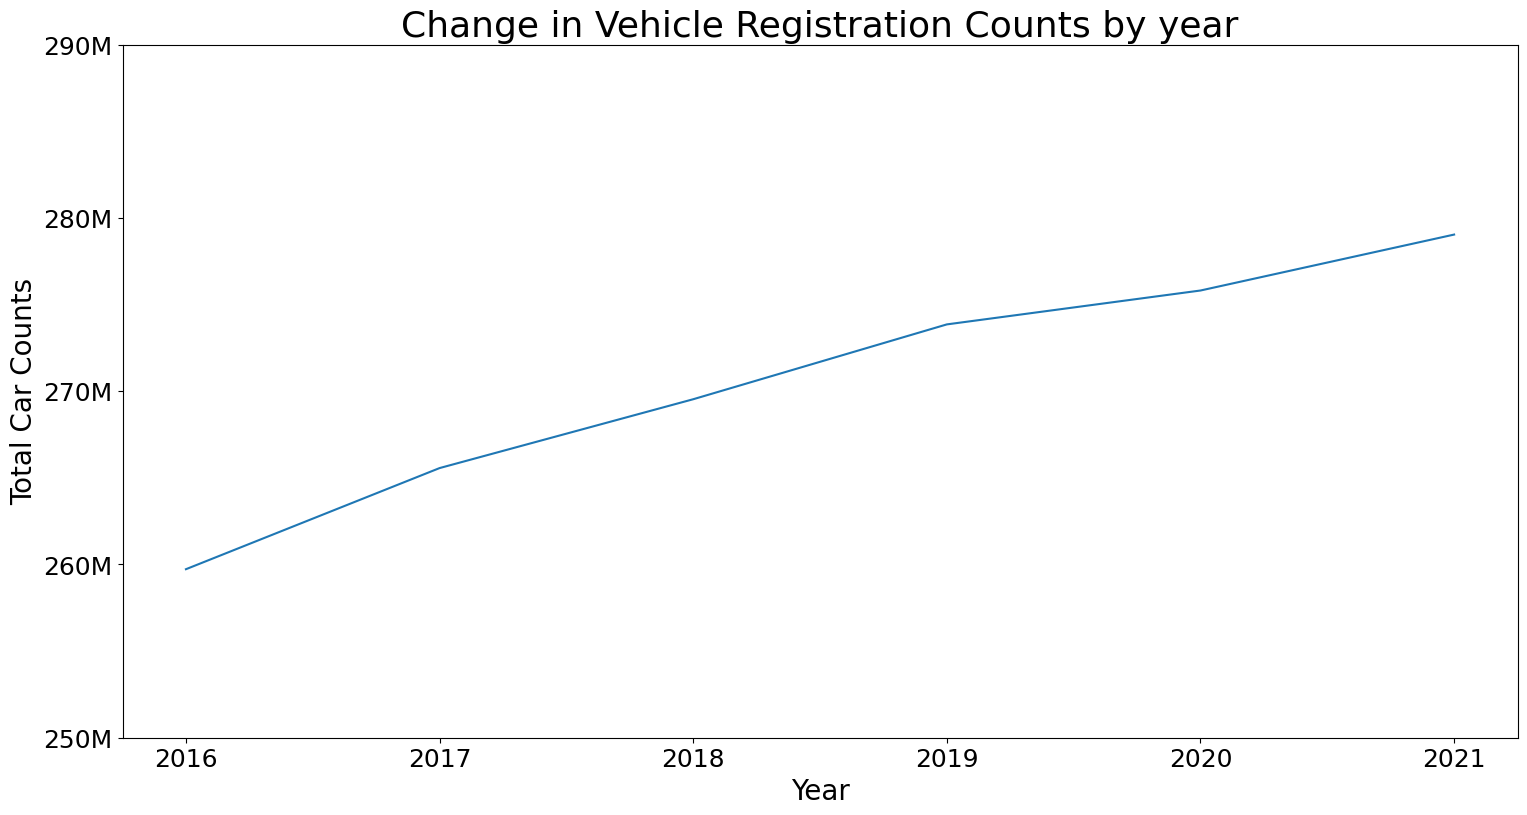

In [101]:
# adopted from class

# Set figure size and plot data
plt.figure(figsize=(18,9))
plt.plot(df_year['year'], df_year['total'])

# Generate title and labels.
plt.title('Change in Vehicle Registration Counts by year', fontsize=26)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total Car Counts', fontsize=20);

# Enlarge tick marks.
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yticks([250000000, 260000000, 270000000, 280000000, 290000000], 
           ['250M', '260M', '270M', '280M', '290M']);

In [130]:
df_year_plot = df_year.set_index('year')

In [133]:
df_year_plot = df_year_plot.drop(['total'], axis=1)

<Figure size 1800x900 with 0 Axes>

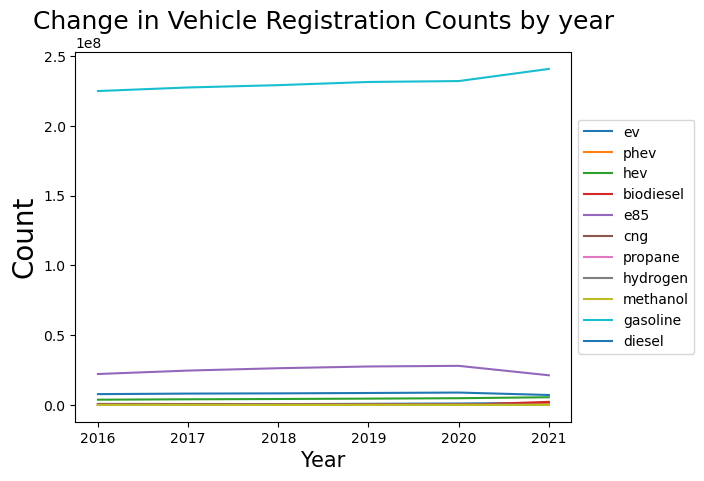

In [142]:
plt.figure(figsize=(18,9))
df_year_plot.plot()
plt.xlabel("Year", size = 15)
plt.ylabel("Count", size = 20)
plt.title("Change in Vehicle Registration Counts by year", size = 18)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, .5));

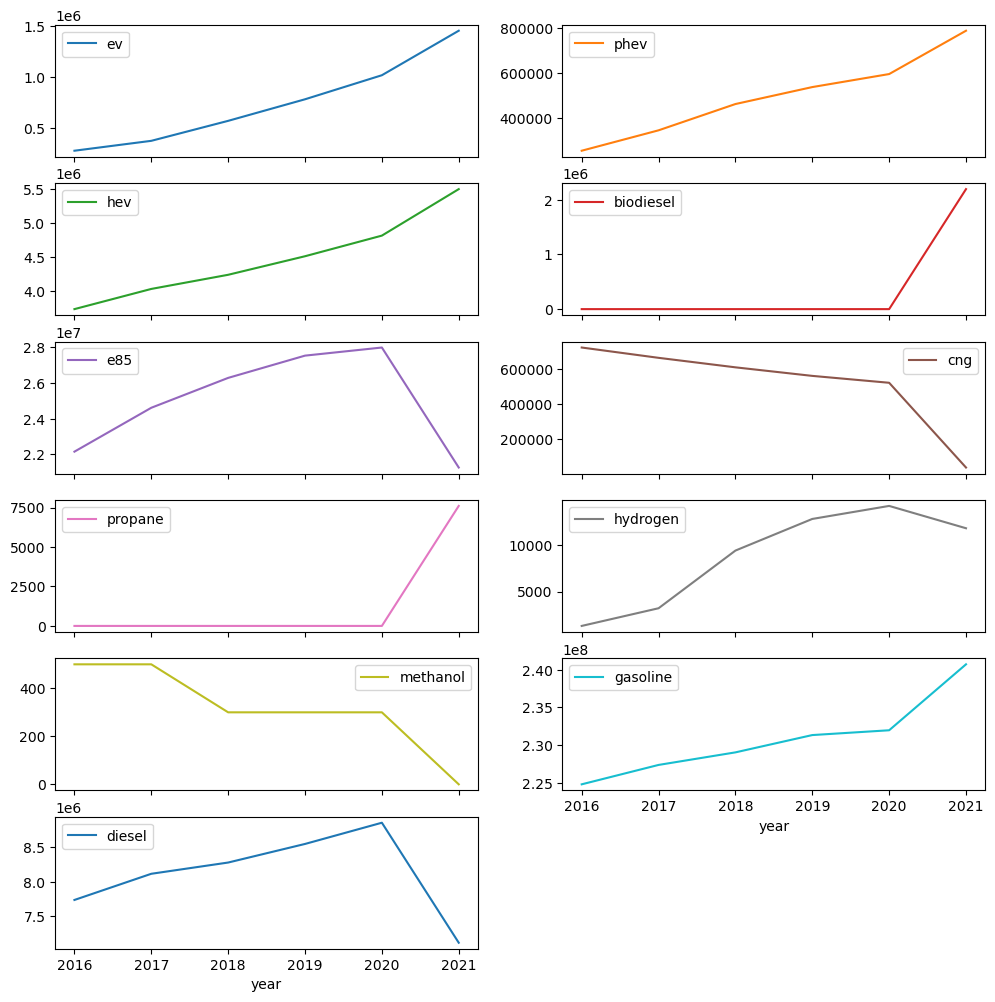

In [137]:
df_year_plot.plot(subplots=True, figsize=(12, 12), layout=(6, 2));